# California housing predictions
### Goal of Analysis: Use machine learning algorithms to get best accuracy of predictions for California housing prices given the attributes in the dataset.

(Note: link to the [dataset](https://www.kaggle.com/camnugent/california-housing-prices))

Load in the data

In [1]:
import pandas as pd

# Load the data
housing_data_path = '../data/housing.csv'
housing = pd.read_csv(housing_data_path)

# Quick look at the data
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Learn more about this data

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Add a title and a legend to this visual below

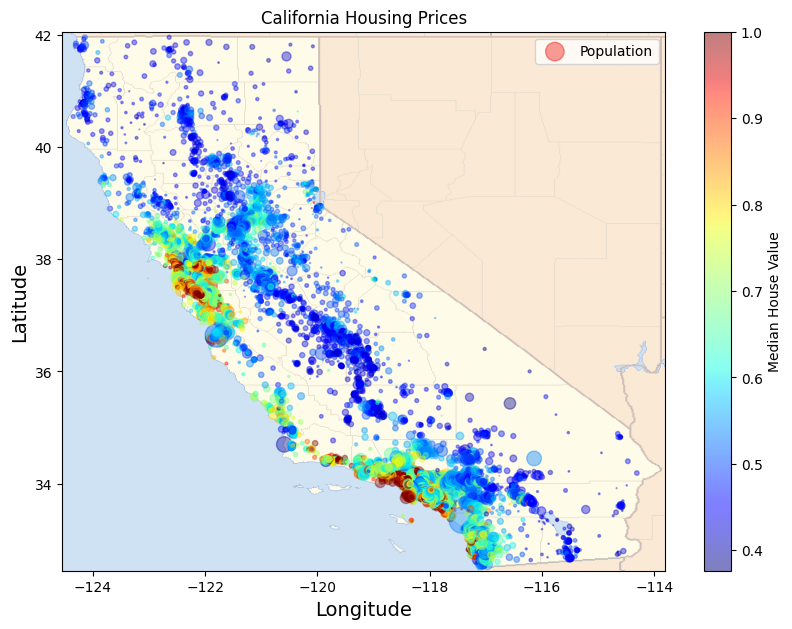

In [5]:
# visualize data based on geographical info
import matplotlib.image as mpimg
import matplotlib.pyplot as mppyplot
import matplotlib.pyplot as plt
import numpy as np

california_img=mpimg.imread('C:\CaliforniaHousingPrediction\images\california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)

# Add a title
plt.title('California Housing Prices')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Median House Value')

# Display the plot
plt.show()

Create a visual of total rooms and the median house price colored by median income 

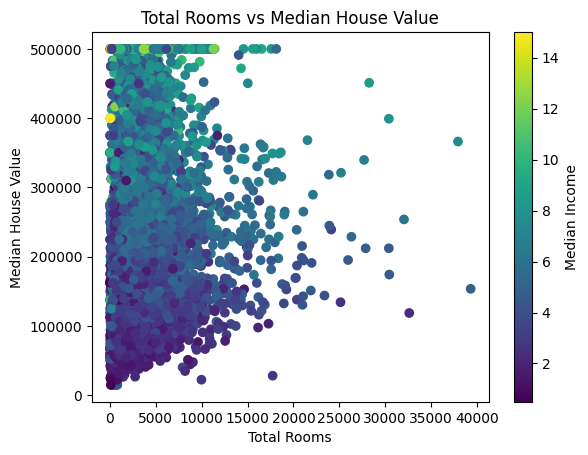

In [5]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.scatter(housing['total_rooms'], housing['median_house_value'], c=housing['median_income'], cmap='viridis')

# Set the title and labels
plt.title('Total Rooms vs Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Median Income')

# Display the plot
plt.show()

Create a subsets of the housing df for x and y values for our model

In [6]:
housing_labels = housing['median_house_value'].copy()
housing.drop('median_house_value', axis=1, inplace=True)

Encode qualitative variables so they can be used in our model

In [7]:
# convert categorical values (ocean proximity) into numbers
# use /explain 
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

housing_num = housing.select_dtypes(include=[np.number])

# Assuming 'housing_num' is your numerical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OrdinalEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [9]:
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  3.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  3.        ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  3.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331,  1.        ],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292,  1.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947,  1.        ]])

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare feature matrix X and target vector y
X = housing_prepared
y = housing_labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (16512, 9)
X_test shape: (4128, 9)
y_train shape: (16512,)
y_test shape: (4128,)


Create a model to predict median house value from the other factors

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 50244.929119901055
